In [66]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
import pandas as pd
%matplotlib inline
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2020,12,11)

In [2]:
moderna = web.DataReader("MRNA", 'yahoo',start,end)
pfizer = web.DataReader("PFE", 'yahoo',start,end)
biontech = web.DataReader("BNTX", 'yahoo',start,end)

In [5]:
moderna.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,37.333965,36.888046,37.286526,37.134724,16514100.0,35.677311
2020-01-03,37.229603,36.688805,36.736244,36.935482,14922800.0,35.485886
2020-01-06,37.001896,36.717266,36.831120,36.888046,15772000.0,35.440315
2020-01-07,37.125237,36.698292,37.115749,36.764706,20108100.0,35.321815
2020-01-08,37.210625,36.764706,36.774193,37.058823,16403500.0,35.604385


In [7]:
pfizer.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,37.333965,36.888046,37.286526,37.134724,16514100.0,35.677311
2020-01-03,37.229603,36.688805,36.736244,36.935482,14922800.0,35.485886
2020-01-06,37.001896,36.717266,36.831120,36.888046,15772000.0,35.440315
2020-01-07,37.125237,36.698292,37.115749,36.764706,20108100.0,35.321815
2020-01-08,37.210625,36.764706,36.774193,37.058823,16403500.0,35.604385


In [6]:
biontech.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,38.500000,35.360001,35.750000,38.500000,139500,38.500000
2020-01-03,41.250000,36.419998,38.000000,40.049999,176000,40.049999
2020-01-06,45.000000,40.099998,40.110001,44.580002,333300,44.580002
2020-01-07,48.849998,41.180000,47.400002,43.340000,562100,43.340000
2020-01-08,46.330002,44.180000,44.299999,45.099998,193900,45.099998


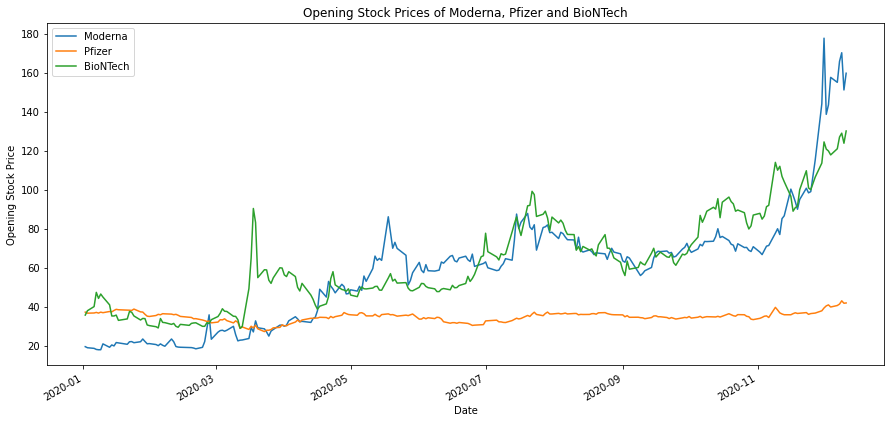

In [18]:
moderna['Open'].plot(label='Moderna',figsize=(15,7))
pfizer['Open'].plot(label='Pfizer')
biontech['Open'].plot(label='BioNTech')
plt.ylabel('Opening Stock Price')
plt.title('Opening Stock Prices of Moderna, Pfizer and BioNTech')
plt.legend()

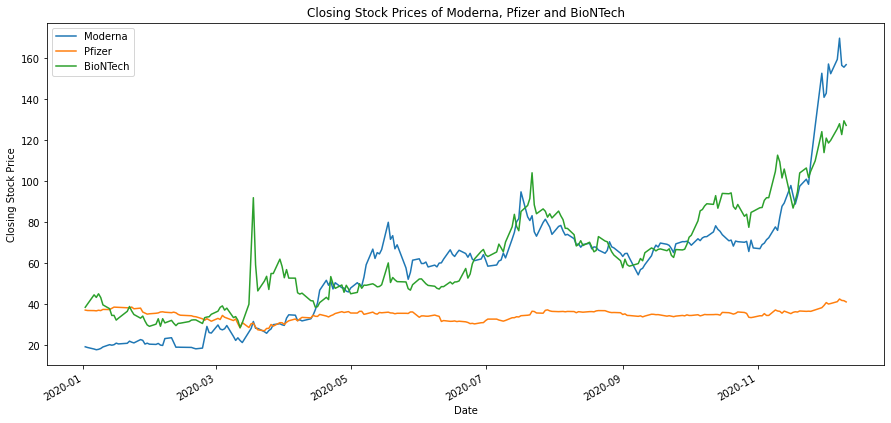

In [17]:
moderna['Close'].plot(label='Moderna',figsize=(15,7))
pfizer['Close'].plot(label='Pfizer')
biontech['Close'].plot(label='BioNTech')
plt.ylabel('Closing Stock Price')
plt.title('Closing Stock Prices of Moderna, Pfizer and BioNTech')
plt.legend()

<AxesSubplot:title={'center':'Opening and Closing Stock Prices of Moderna, Pfizer and BioNTech'}, xlabel='Date', ylabel='Stock Prices'>

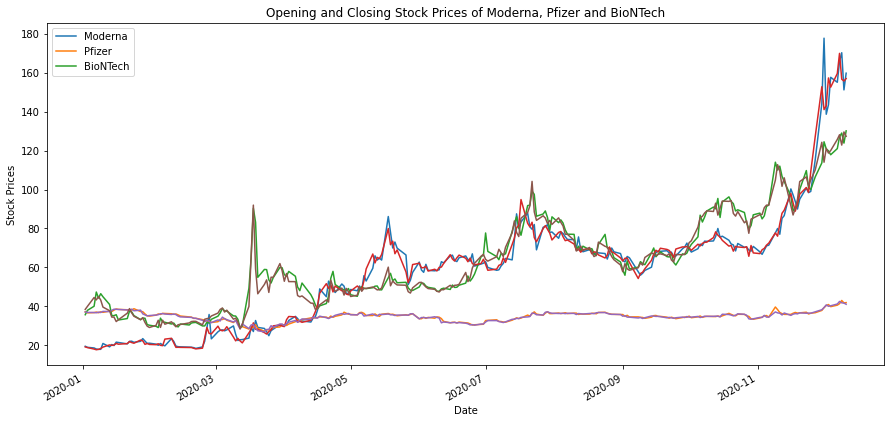

In [16]:
moderna['Open'].plot(label='Moderna',figsize=(15,7))
pfizer['Open'].plot(label='Pfizer')
biontech['Open'].plot(label='BioNTech')
plt.ylabel('Stock Prices')
plt.title('Opening and Closing Stock Prices of Moderna, Pfizer and BioNTech')
plt.legend()
moderna['Close'].plot(label='Moderna',figsize=(15,7))
pfizer['Close'].plot(label='Pfizer')
biontech['Close'].plot(label='BioNTech')

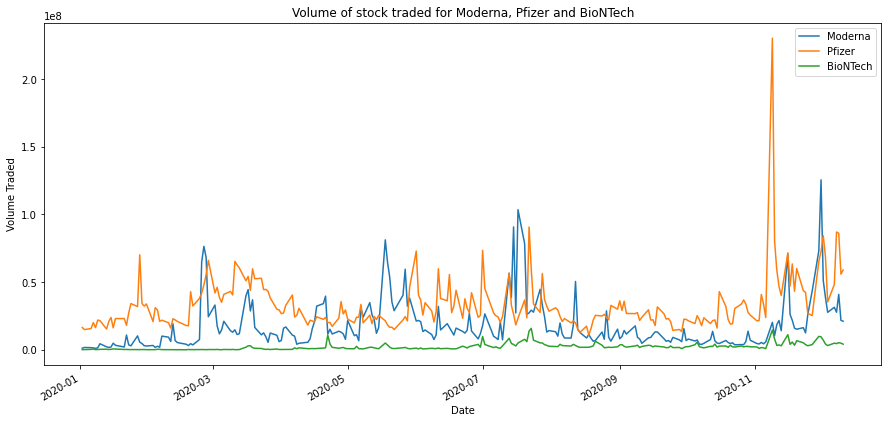

In [19]:
moderna['Volume'].plot(label='Moderna',figsize=(15,7))
pfizer['Volume'].plot(label='Pfizer',figsize=(15,7))
biontech['Volume'].plot(label='BioNTech',figsize=(15,7))
plt.ylabel('Volume Traded')
plt.title('Volume of stock traded for Moderna, Pfizer and BioNTech')
plt.legend()

In [21]:
pfizer.iloc[[pfizer['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-09,39.838711,36.413662,39.71537,37.19165,230153900.0,37.19165


<AxesSubplot:xlabel='Date'>

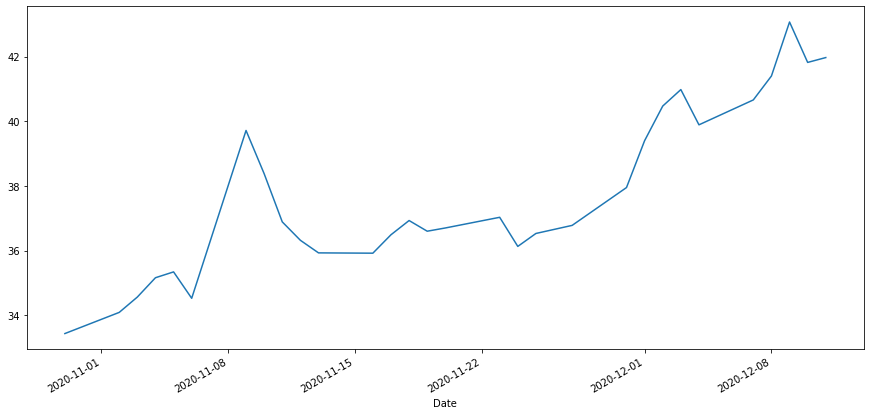

In [55]:
pfizer.iloc[210:250]['Open'].plot(figsize=(15,7))

In [57]:
moderna['Total Traded'] = moderna['Open'] * moderna['Volume']
pfizer['Total Traded'] = pfizer['Open'] * pfizer['Volume']
biontech['Total Traded'] = biontech['Open'] * biontech['Volume']

Text(0, 0.5, 'Total Traded')

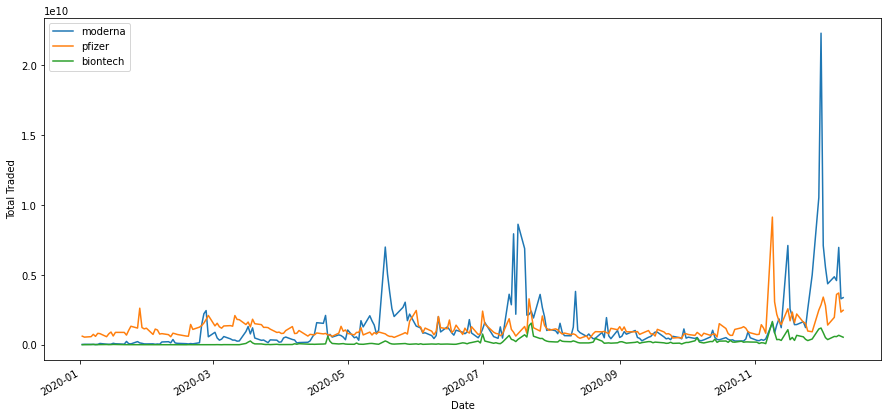

In [58]:
moderna['Total Traded'].plot(label='moderna',figsize = (15,7))
pfizer['Total Traded'].plot(label='pfizer',figsize = (15,7))
biontech['Total Traded'].plot(label='biontech',figsize = (15,7))
plt.legend()
plt.ylabel('Total Traded')

In [59]:
moderna['Total Traded'].argmax()

231

In [60]:
moderna.iloc[[moderna['Total Traded'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2020-12-01,178.5,130.330002,177.660004,141.009995,125552300,141.009995,2.230562e+10


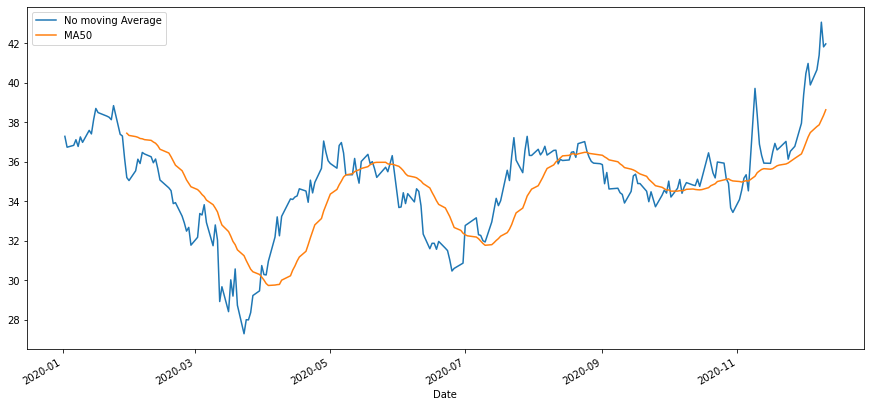

In [64]:
pfizer['Open'].plot(label = 'No moving Average', figsize=(15,7))
pfizer['MA20'] = pfizer['Open'].rolling(20).mean()
pfizer['MA20'].plot(label='MA50')
plt.legend()

In [67]:
drug_comp = pd.concat([moderna['Open'],pfizer['Open'],biontech['Open']], axis = 1)
drug_comp.columns = ['Moderna Open', 'Pfizer Open', 'BioNTech Open']

array([[<AxesSubplot:xlabel='Moderna Open', ylabel='Moderna Open'>,
        <AxesSubplot:xlabel='Pfizer Open', ylabel='Moderna Open'>,
        <AxesSubplot:xlabel='BioNTech Open', ylabel='Moderna Open'>],
       [<AxesSubplot:xlabel='Moderna Open', ylabel='Pfizer Open'>,
        <AxesSubplot:xlabel='Pfizer Open', ylabel='Pfizer Open'>,
        <AxesSubplot:xlabel='BioNTech Open', ylabel='Pfizer Open'>],
       [<AxesSubplot:xlabel='Moderna Open', ylabel='BioNTech Open'>,
        <AxesSubplot:xlabel='Pfizer Open', ylabel='BioNTech Open'>,
        <AxesSubplot:xlabel='BioNTech Open', ylabel='BioNTech Open'>]],
      dtype=object)

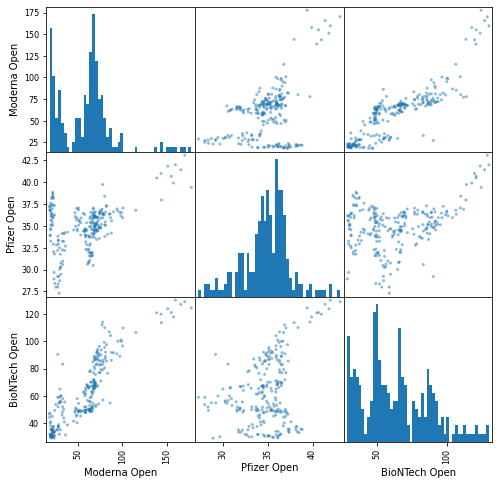

In [68]:
scatter_matrix(drug_comp,figsize=(8,8), hist_kwds={'bins':50})